In [1]:
!pip install lmfit
!pip install scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00


In [19]:
#Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import models
import numpy as np
from scipy import stats

#Import data
filename = "/content/UMlifetimemuon7days.csv"

#Create a dataframe
dataframe_lifetimes = pd.DataFrame()

#Reads your data file
dataframe_total = pd.read_csv(filename)


#Selects the lifetime data and places it in the created dataframe
dataframe_lifetimes['Lifetimes (ns)'] = dataframe_total['Lifetimes (ns)']
dataframe_lifetimes.dropna(inplace=True)

#Sorts the lifetime data from short to long
dataframe_lifetimes.sort_values(by=['Lifetimes (ns)'], inplace=True)

#Remove outlier from the dataset
dataframe_lifetimes = dataframe_lifetimes[~((dataframe_lifetimes['Lifetimes (ns)'] == 424630))]

#Shows the sorted data on screen
dataframe_lifetimes


,Lifetimes (ns)
10537,80
9024,100
322,100
4423,110
8369,110
...,...
8813,20260
6868,20270
5177,20290
6286,20290


In [20]:
#Import data
filename2 = "/content/Suzan.csv"

#Create a dataframe
dataframe_lifetimes2 = pd.DataFrame()

#Reads your data file
dataframe_total2 = pd.read_csv(filename2)

#Selects the lifetime data and places it in the created dataframe
dataframe_lifetimes2['Lifetimes (ns)'] = dataframe_total2['Lifetimes (ns)']
dataframe_lifetimes2.dropna(inplace=True)

#Sorts the lifetime data from short to long
dataframe_lifetimes2.sort_values(by=['Lifetimes (ns)'], inplace=True)

#Shows the sorted data on screen
dataframe_lifetimes2

,Lifetimes (ns)
12615,100
3713,100
1590,100
5932,110
11538,110
...,...
5519,20390
11186,20390
5285,20400
7403,20430


Text(0, 0.5, 'Counts')

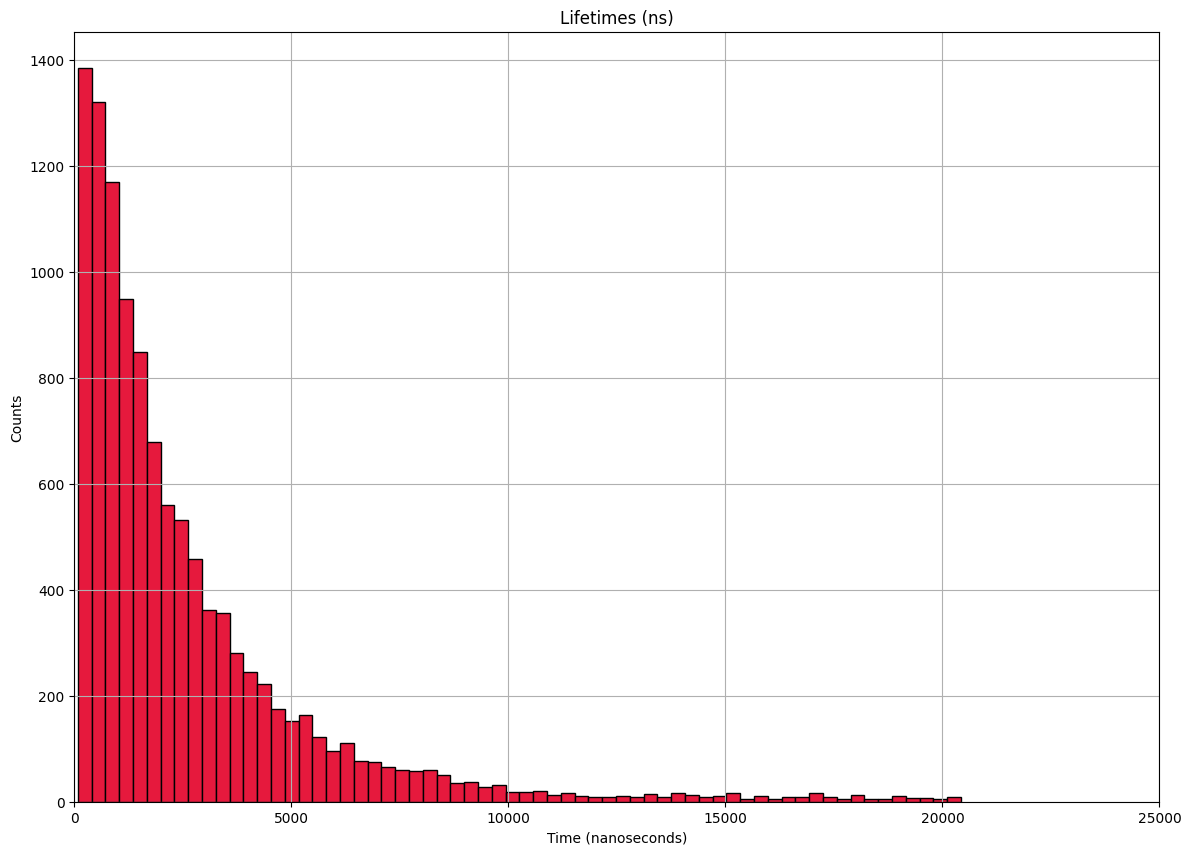

In [22]:
bins = 64 #Set binning to nice graph
#Set limits to graph suited to the data
lower_limit_x = 0
upper_limit_x = 25000

#Plots your data in a histogram
dataframe_lifetimes.hist(bins=bins,
                         figsize=([14,10]),
                         linewidth=1,
                         edgecolor='black',
                         color=[230 / 255, 25 / 255, 61 / 255],
                        )
plt.xlim(lower_limit_x, upper_limit_x)
plt.xlabel("Time (nanoseconds)")
plt.ylabel("Counts")

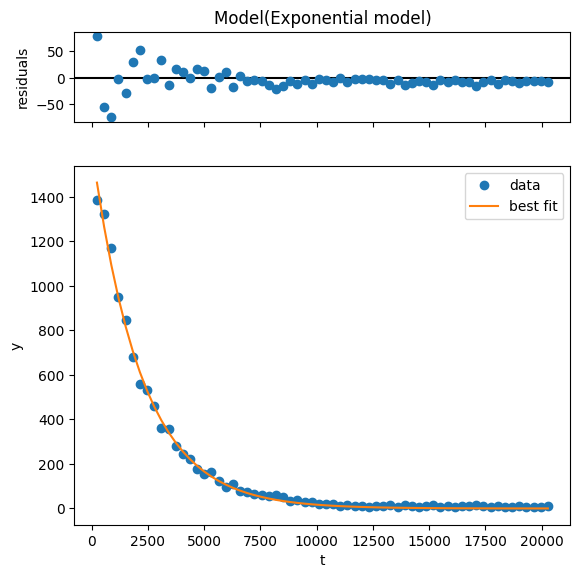

In [25]:
#Transforms data to histogram
y_data, bin_edges = np.histogram(dataframe_lifetimes['Lifetimes (ns)'], bins=bins)
t_data = bin_edges[1:] - (bin_edges[1] - bin_edges[0]) / 2

#Creates model function: an exponential model + a constant C
f = lambda t, N_0, l: N_0 * np.exp(-l * t)
model = models.Model(f, name='Exponential model')

#Fits your model: find the optimal values for A, B and C
fit = model.fit(y_data, t=t_data, N_0=1000, l=1e-4)

#Plots and displays the results of your fit
fit.plot()
fit

$\tau$ = 1/$\lambda$, So $\tau$ = 1/(4.5692x10^-4) = 2188.57 ns = 2.188 μs

$\delta$ = (2.188 - 2.2) / 2.2 = -0.5197%

$\tau$ = 2.188 +- 0.031 μs

Text(0, 0.5, 'Counts')

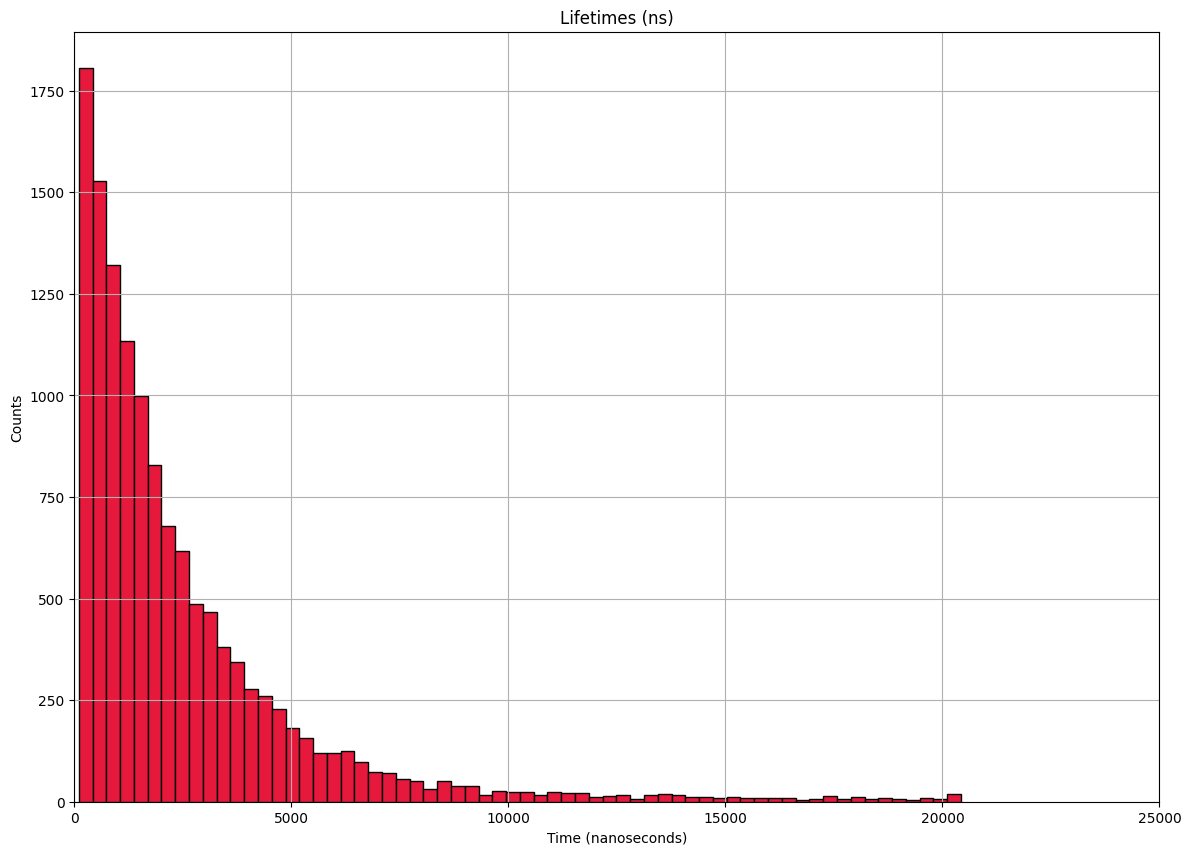

In [9]:
bins = 64 #Set binning to nice graph
#Set limits to graph suited to the data
lower_limit_x = 0
upper_limit_x = 25000

#Plots your data in a histogram
dataframe_lifetimes2.hist(bins=bins,
                         figsize=([14,10]),
                         linewidth=1,
                         edgecolor='black',
                         color=[230 / 255, 25 / 255, 61 / 255],
                        )
plt.xlim(lower_limit_x, upper_limit_x)
plt.xlabel("Time (nanoseconds)")
plt.ylabel("Counts")

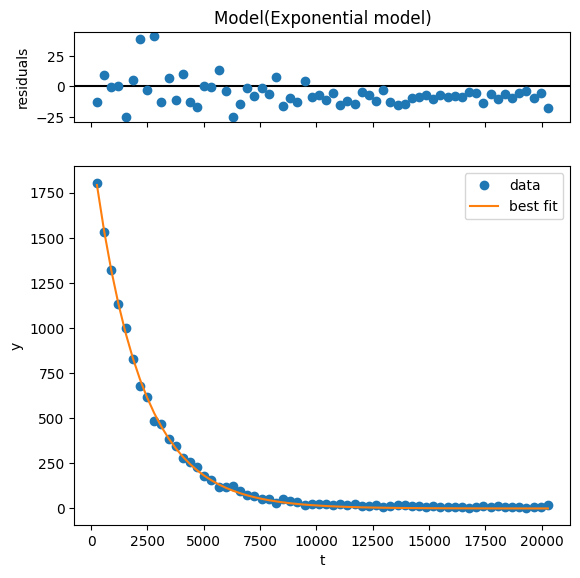

In [11]:
#Transforms data to histogram
y_data2, bin_edges = np.histogram(dataframe_lifetimes2['Lifetimes (ns)'], bins=bins)
t_data2 = bin_edges[1:] - (bin_edges[1] - bin_edges[0]) / 2

#Creates model function: an exponential model + a constant C
f = lambda t, N_0, l: N_0 * np.exp(-l * t)
model = models.Model(f, name='Exponential model')

#Fits your model: find the optimal values for A, B and C
fit = model.fit(y_data2, t=t_data2, N_0=1000, l=1e-4)

#Plots and displays the results of your fit
fit.plot()
fit

$\tau$ = 1/$\lambda$, So $\tau$ = 1/(4.8078x10^-04) = 2079.95 ns = 2.080 μs

$\delta$ = (2.080 - 2.20) / 2.20 = -5.457%

$\tau$ = 2.080 +- 0.015 μs

In [27]:
# Given values
lambda_value1 = 0.00045692  # decay constant in ns^-1
delta_lambda1 = 0.0000064481  # uncertainty in lambda in ns^-1

# Calculating the uncertainty in tau
delta_tau = delta_lambda1 / (lambda_value1 ** 2)
print(f"Uncertainty in tau: {delta_tau:.6f} ns")

Uncertainty in tau: 30.885272 ns


In [26]:
# Given values
lambda_value2 = 0.00048078  # decay constant in ns^-1
delta_lambda2 = 0.0000035352  # uncertainty in lambda in ns^-1

# Calculating the uncertainty in tau
delta_tau = delta_lambda2 / (lambda_value2 ** 2)
print(f"Uncertainty in tau: {delta_tau:.6f} ns")

Uncertainty in tau: 15.294004 ns
